In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the data

In [397]:
df = pd.read_csv('train.csv')

In [398]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [399]:
sample_submission = pd.read_csv('sampleSubmission.csv')
sample_submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [400]:
df_test =  pd.read_csv('test.csv')
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [401]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [402]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [403]:
df.shape

(10886, 12)

# Exploring

In [404]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

## Time

In [405]:
time_column = pd.DatetimeIndex(df['datetime'])
hour = time_column.hour

In [406]:
df['hour'] = hour

In [407]:
hour

array([ 0,  1,  2, ..., 21, 22, 23])

In [408]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### working day / weekend

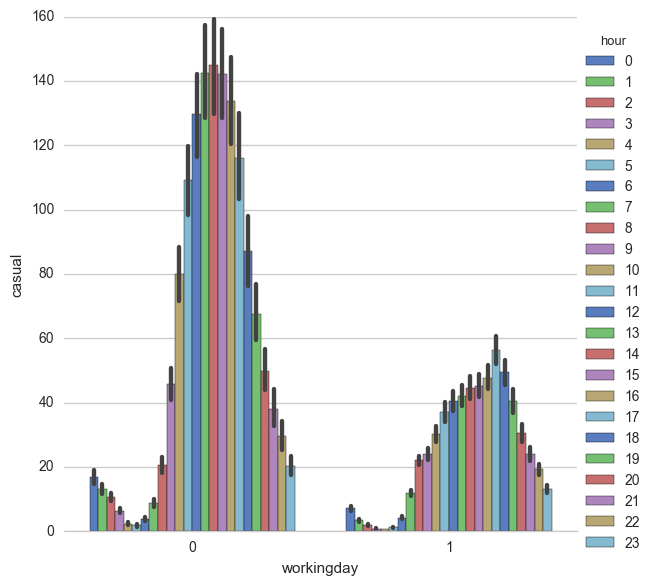

In [130]:
sns.set(style="whitegrid")

g = sns.factorplot(x="workingday", y="casual", hue= "hour", data=df,
                   size=6, kind="bar", palette="muted")

g.despine(left=True)
g.set_ylabels("casual")

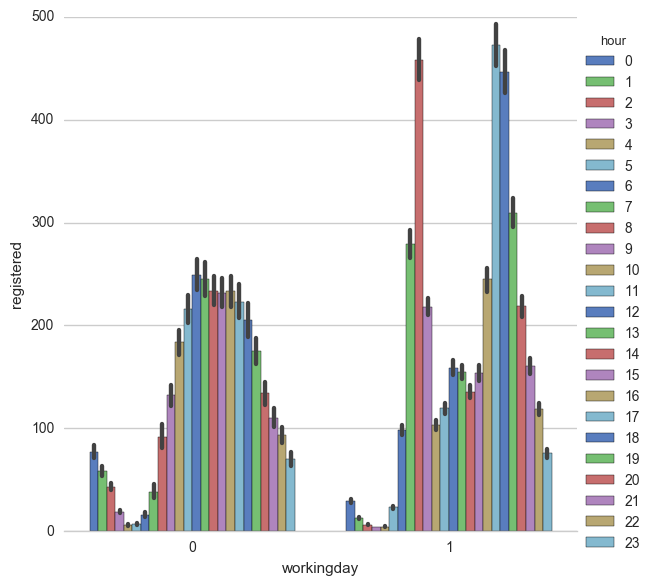

In [131]:
sns.set(style="whitegrid")

g = sns.factorplot(x="workingday", y="registered", hue= "hour", data=df,
                   size=6, kind="bar", palette="muted")

g.despine(left=True)
g.set_ylabels("registered")

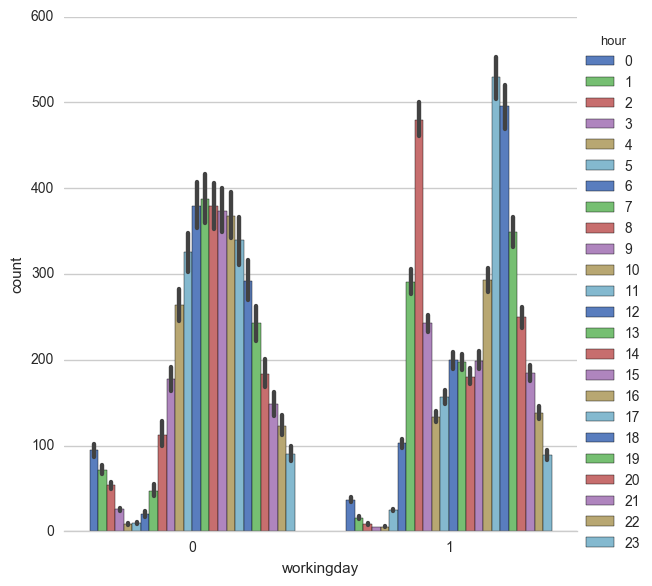

In [132]:
sns.set(style="whitegrid")

g = sns.factorplot(x="workingday", y="count", hue= "hour", data=df,
                   size=6, kind="bar", palette="muted")

g.despine(left=True)
g.set_ylabels("count")

### holiday or not

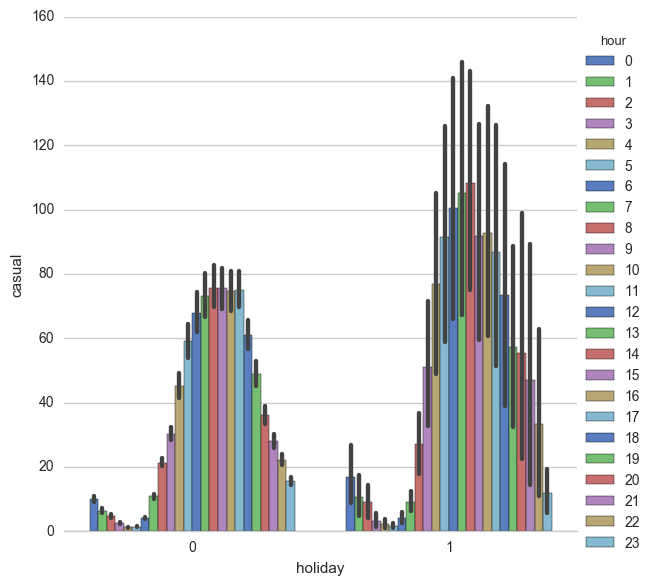

In [133]:
sns.set(style="whitegrid")

g = sns.factorplot(x="holiday", y="casual", hue= "hour", data=df,
                   size=6, kind="bar", palette="muted")

g.despine(left=True)
g.set_ylabels("casual")

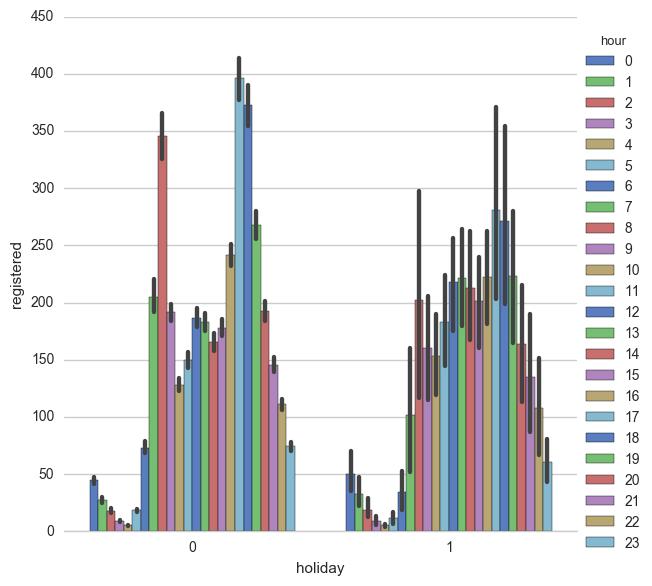

In [134]:
sns.set(style="whitegrid")

g = sns.factorplot(x="holiday", y="registered", hue= "hour", data=df,
                   size=6, kind="bar", palette="muted")

g.despine(left=True)
g.set_ylabels("registered")

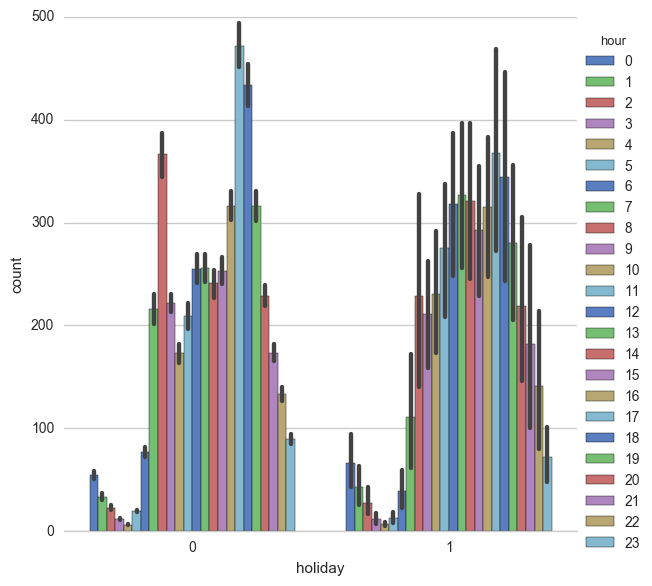

In [135]:
sns.set(style="whitegrid")

g = sns.factorplot(x="holiday", y="count", hue= "hour", data=df,
                   size=6, kind="bar", palette="muted")

g.despine(left=True)
g.set_ylabels("count")

1. holiday = 1 works similiar to workingday = 0. So, holiday or not working day --> one variable?
2. Holiday column isn't very informative.

## Season

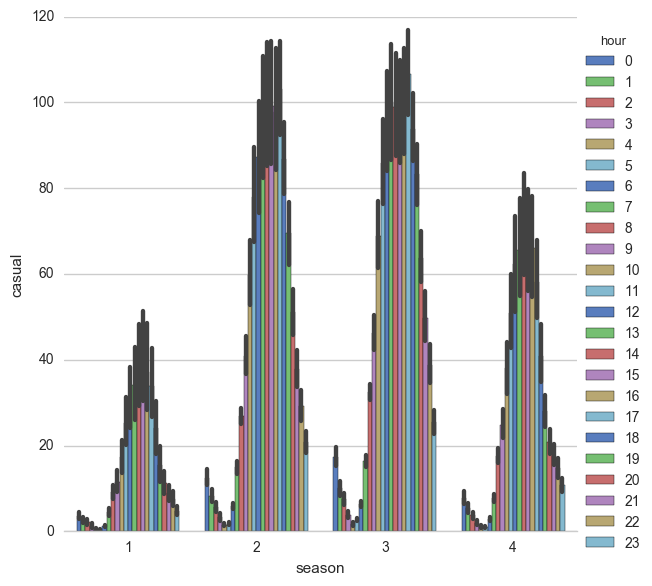

In [136]:
sns.set(style="whitegrid")

g = sns.factorplot(x="season", y="casual", hue="hour", data=df,
                   size=6, kind="bar", palette="muted")

g.despine(left=True)
g.set_ylabels("casual")

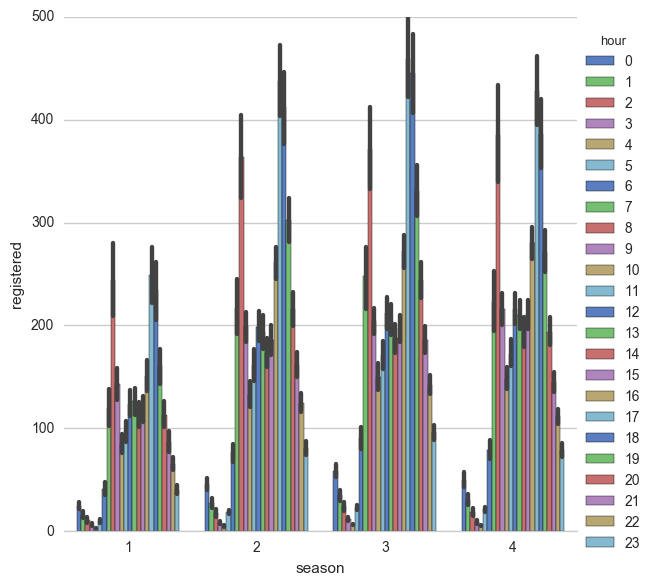

In [137]:
sns.set(style="whitegrid")

g = sns.factorplot(x="season", y="registered", hue="hour", data=df,
                   size=6, kind="bar", palette="muted")

g.despine(left=True)
g.set_ylabels("registered")

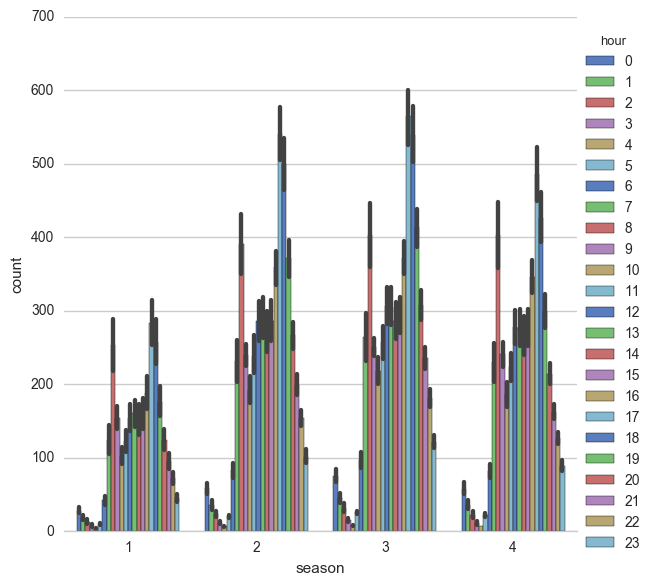

In [138]:
sns.set(style="whitegrid")

g = sns.factorplot(x="season", y="count", hue="hour", data=df,
                   size=6, kind="bar", palette="muted")

g.despine(left=True)
g.set_ylabels("count")

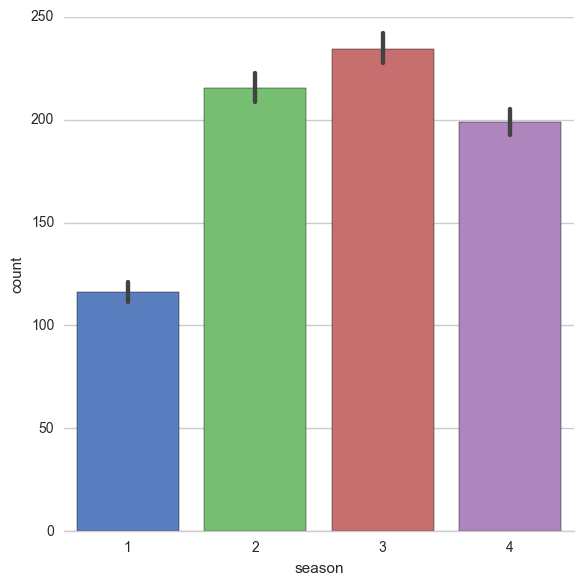

In [139]:
sns.set(style="whitegrid")

g = sns.factorplot(x="season", y="count", data=df,
                   size=6, kind="bar", palette="muted")

g.despine(left=True)
g.set_ylabels("count")

1. WTF? Why spring?

## Weather

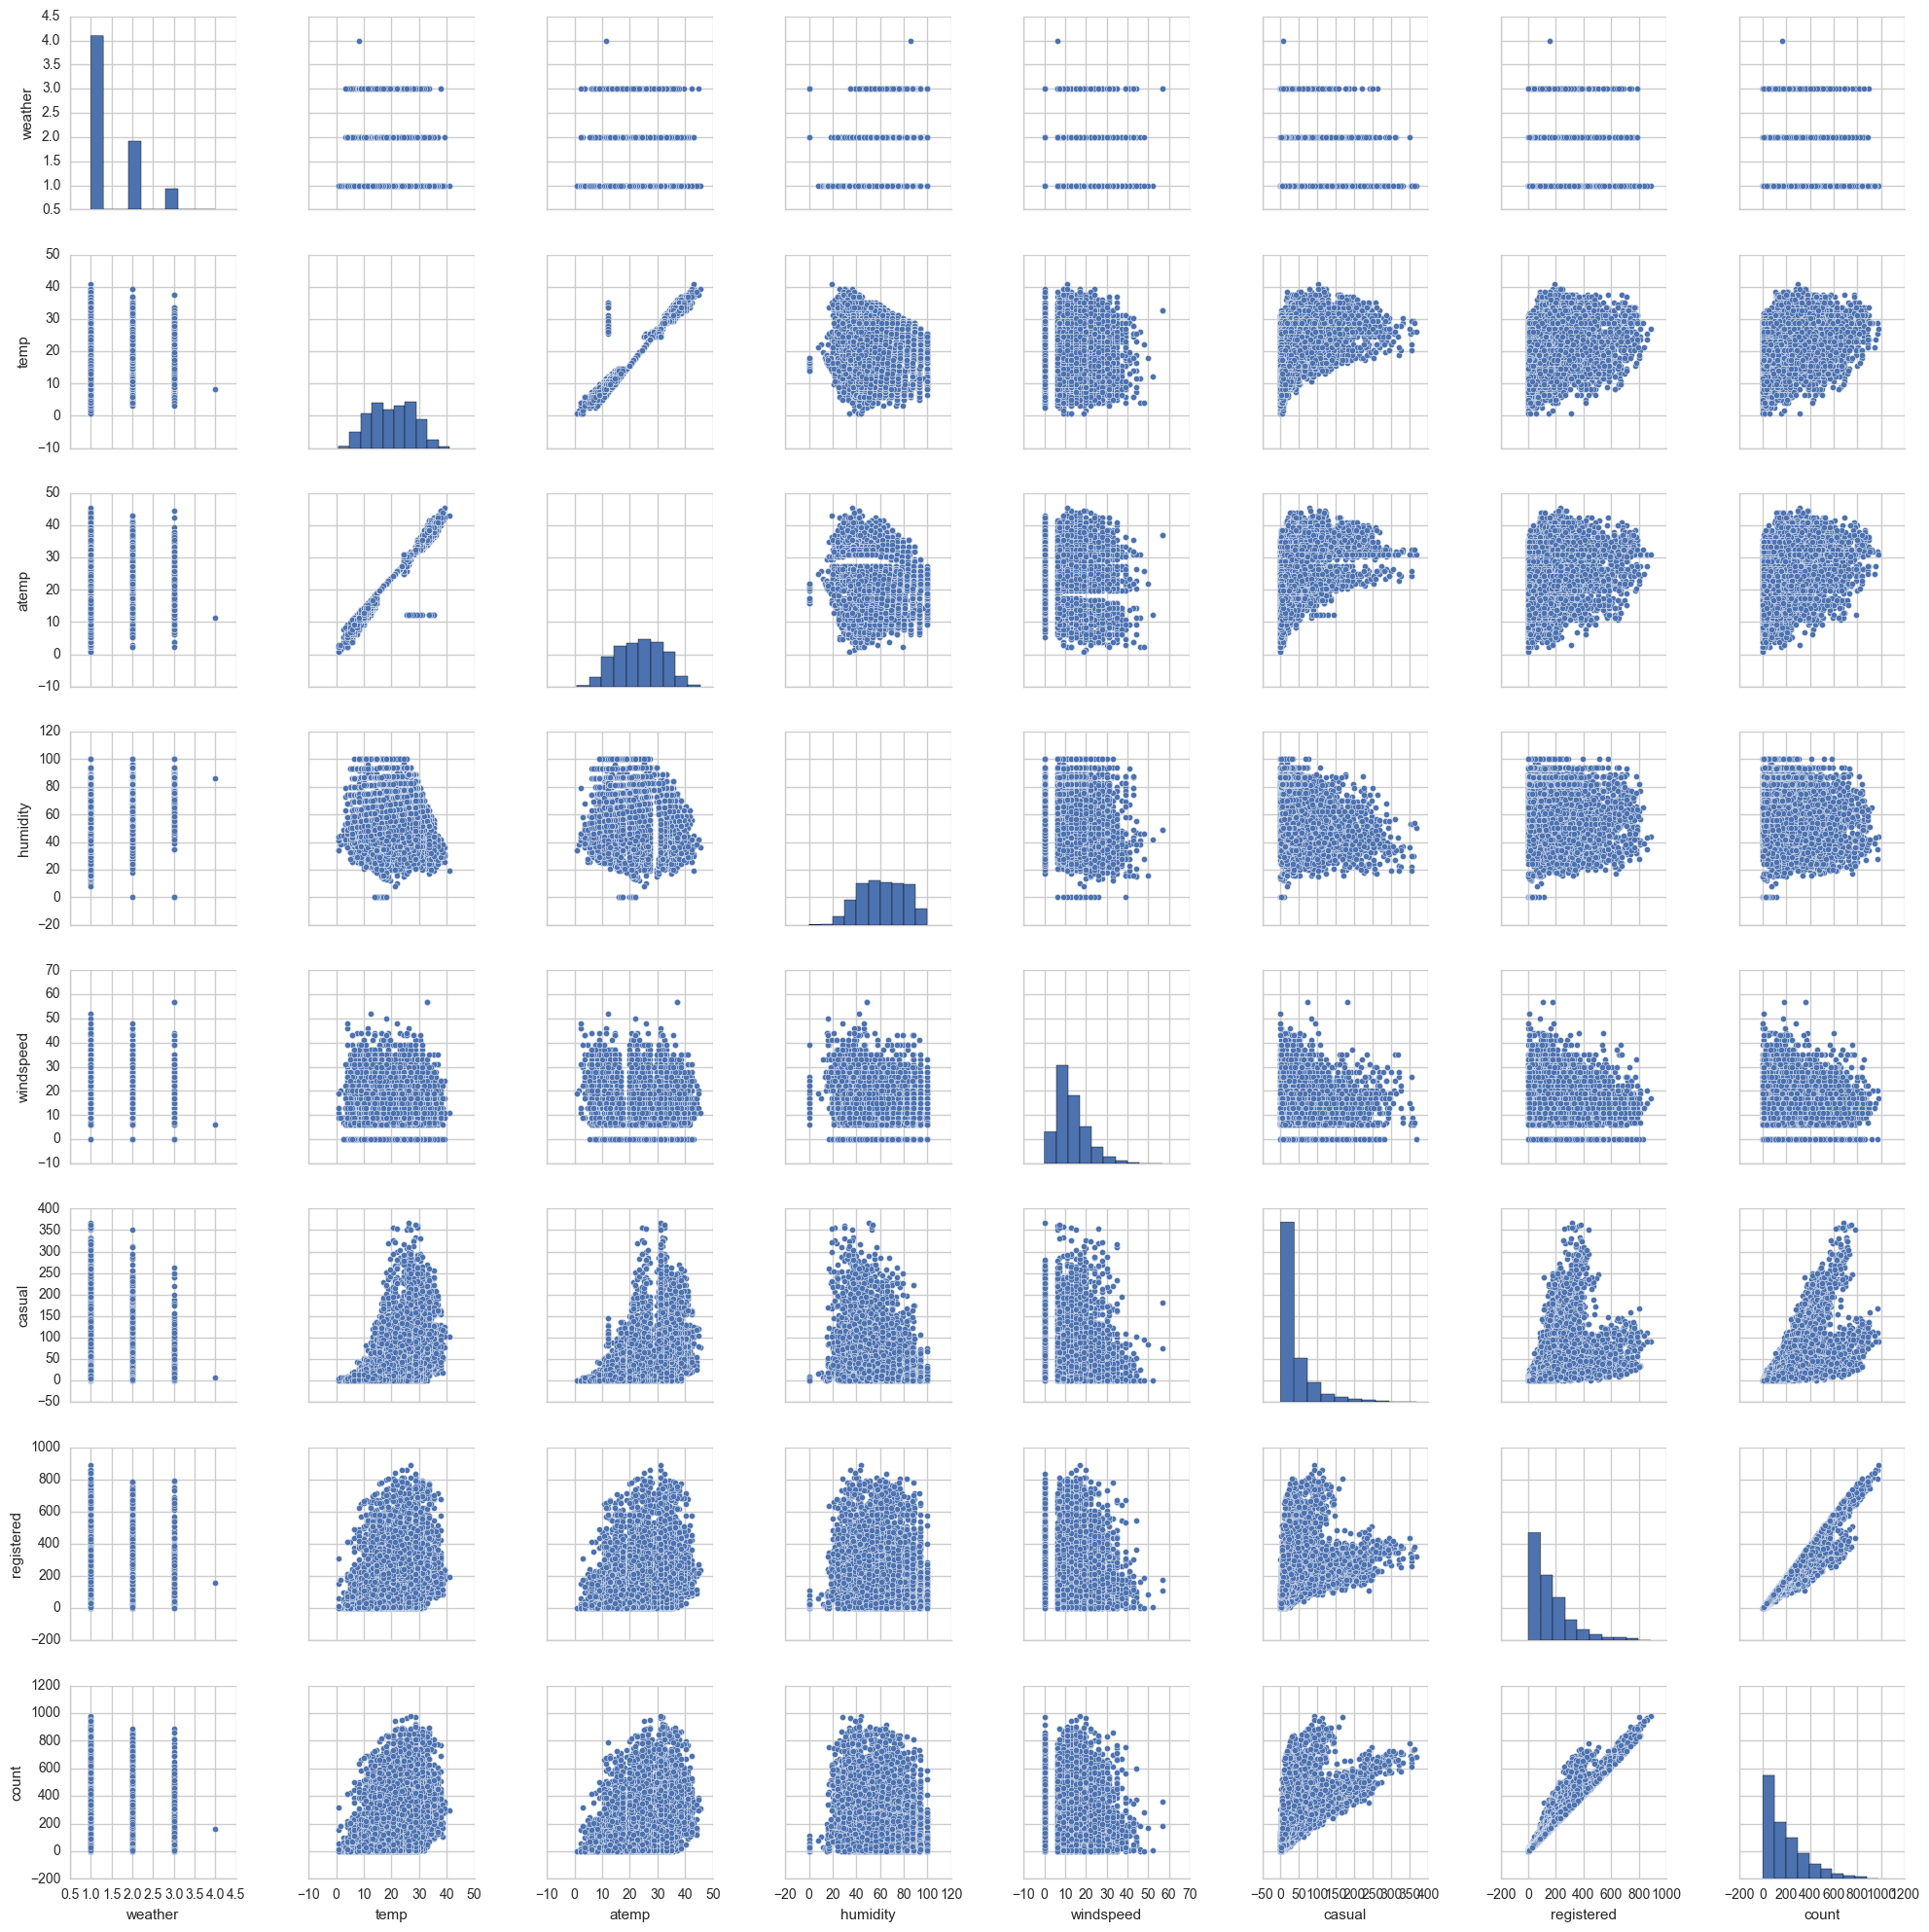

In [140]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context='notebook')
cols = ['weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered' , 'count']

sns.pairplot(df[cols], size=2.5)
plt.tight_layout()

plt.show()

1. Registered are little harder to discourage by 'bad weather' than casual.
3. temp and atemp very correlated

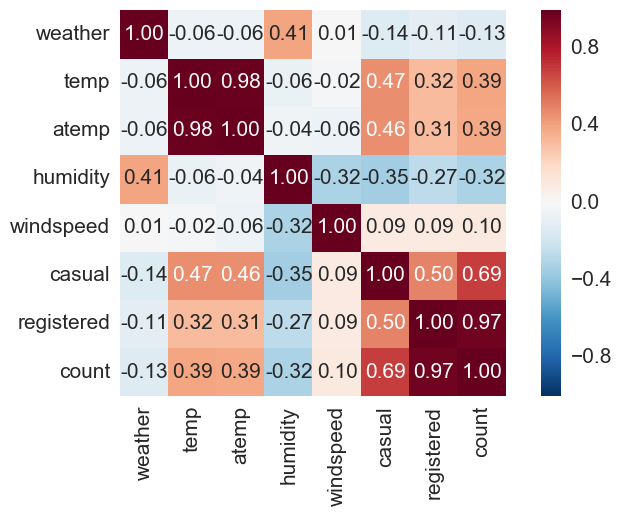

In [141]:
import numpy as np
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, 
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=cols,
            xticklabels=cols)

plt.tight_layout()
plt.show()

In [142]:
df[df['weather'] == 4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164,18


## PCA weather

In [414]:
X_weather = df[['weather', 'temp', 'atemp', 'humidity', 'windspeed']].values
X_weather = sc.transform(X_weather)
df_pca = pd.DataFrame(pca.transform(X_weather),  columns = ['weather_pca1', 'weather_pca2'])

df = df.join(df_pca)

df.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,weather_pca1,weather_pca2
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,-1.704174,-0.802056
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,-1.833877,-0.745167
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2,-1.833877,-0.745167
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3,-1.666152,-0.583661
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4,-1.666152,-0.583661
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,5,-2.004539,-1.073438
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,6,-1.833877,-0.745167
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,7,-2.007527,-0.943141
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,8,-1.666152,-0.583661
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14,9,-1.129154,-0.701881


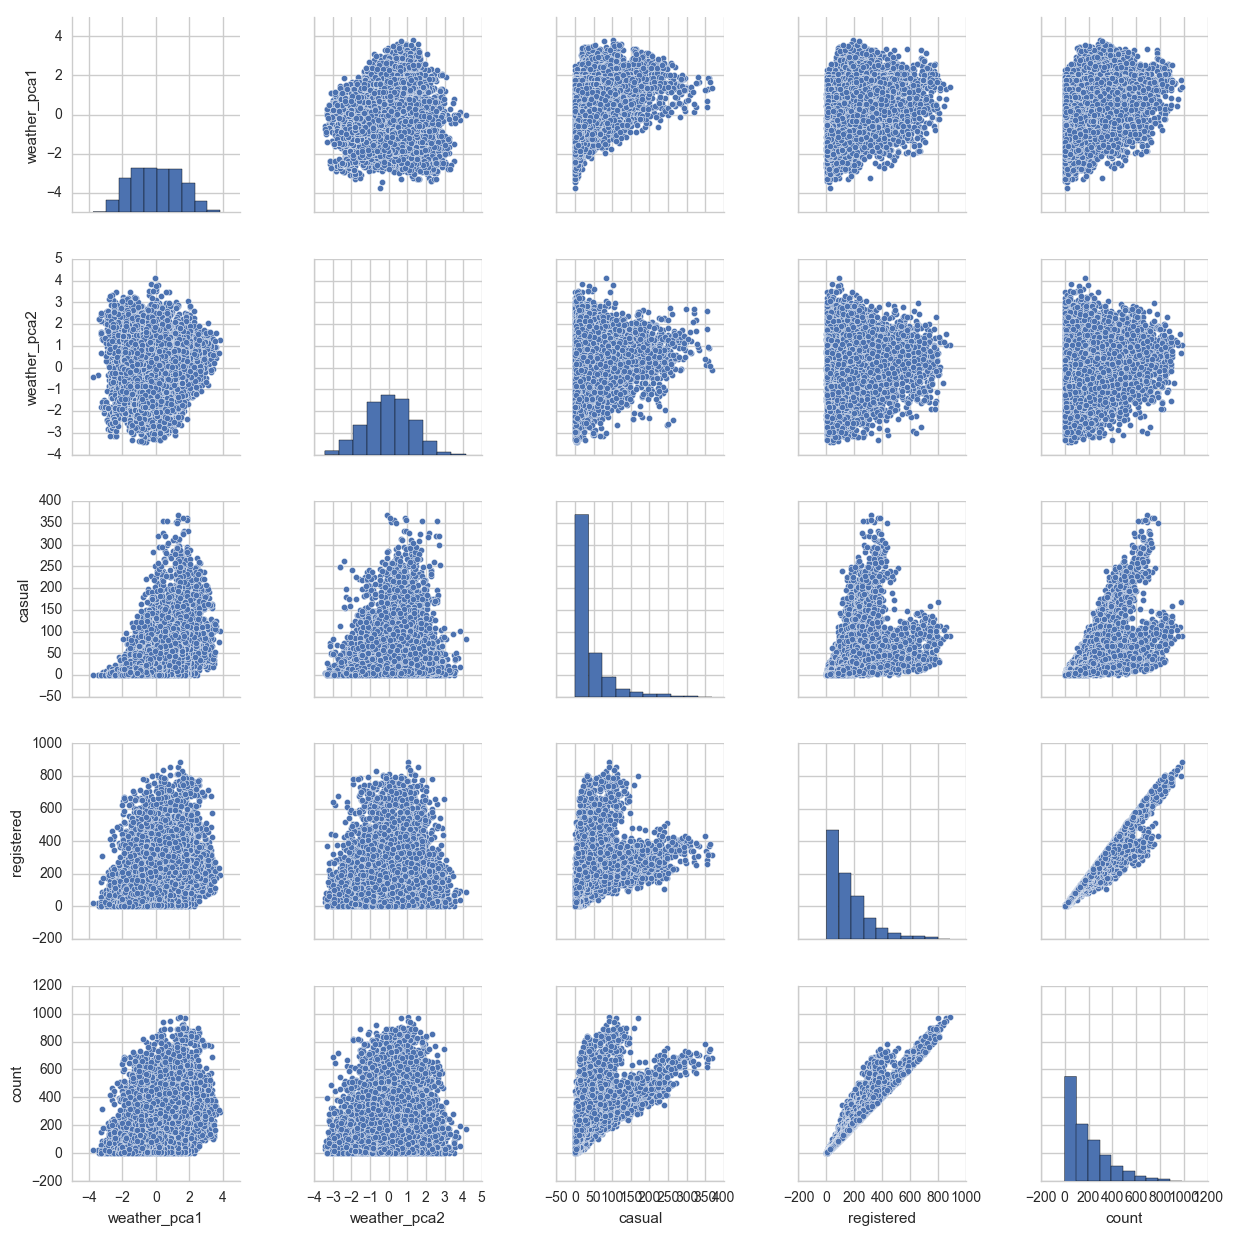

In [415]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context='notebook')
cols = ['weather_pca1', 'weather_pca2', 'casual', 'registered' , 'count']

sns.pairplot(df[cols], size=2.5)
plt.tight_layout()

plt.show()

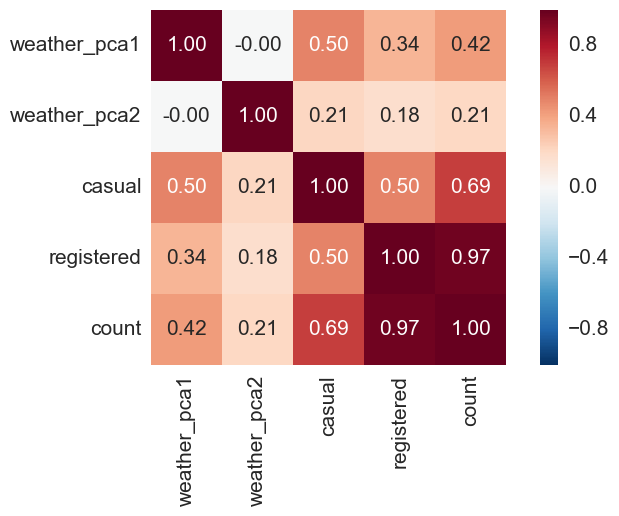

In [416]:
import numpy as np
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, 
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=cols,
            xticklabels=cols)

plt.tight_layout()
plt.show()

1. Maybe weather 1, 2 or 3 hour before is relevant?

# Preprocessing

In [626]:
df = pd.read_csv('train.csv')

In [627]:
# extracting hours form time column
time_column = pd.DatetimeIndex(df['datetime'])
hour = time_column.hour
df['hour'] = hour

In [628]:
# dividing data into a training set and a test set
from sklearn.model_selection import train_test_split

X = df[['season', 'hour', 'workingday', 'holiday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed']].values
y = df['count'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    
# we log-transform the values
y_train = np.log(y_train)

In [629]:
np.isinf(y).sum(), np.isinf(np.log(y)).sum()

(0, 0)

C:\Users\SmilingAtheist\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


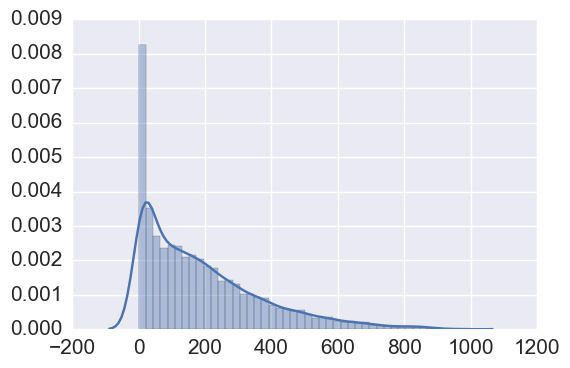

In [630]:
sns.distplot(y)

C:\Users\SmilingAtheist\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


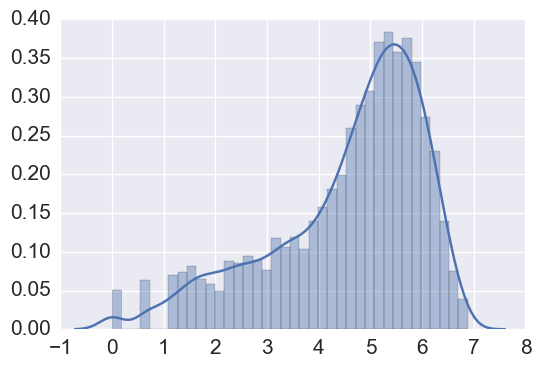

In [631]:
sns.distplot(y_train)

In [632]:
# One-hot-encoding 'season' and 'hour'
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(categorical_features=[0, 1])
X_train = ohe.fit_transform(X_train).toarray()
X_test = ohe.transform(X_test).toarray()

X_train.shape, X_test.shape

((8708, 35), (2178, 35))

In [633]:
#dividing into weather data: 'weather', 'temp', 'atemp', 'humidity', 'windspeed' 
#and non-weather data 'season', 'hour', 'workingday', 'holiday'

X_train_not_weather, X_train_weather = X_train[:, :-5], X_train[:, -5:]
X_test_not_weather, X_test_weather = X_test[:, :-5], X_test[:, -5:]

X_train_not_weather.shape, X_train_weather.shape

((8708, 30), (8708, 5))

In [634]:
#standarizing 'weather', 'temp', 'atemp', 'humidity', 'windspeed'
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_weather_std = sc.fit_transform(X_train_weather)
X_test_weather_std = sc.transform(X_test_weather)

In [635]:
# Applying pca to 'weather', 'temp', 'atemp', 'humidity', 'windspeed'. Exploring.
from sklearn.decomposition import PCA

pca = PCA()
X_train_weather_std_pca = pca.fit_transform(X_train_weather_std)
pca.explained_variance_ratio_

array([ 0.40062109,  0.30052768,  0.20001149,  0.09608292,  0.00275682])

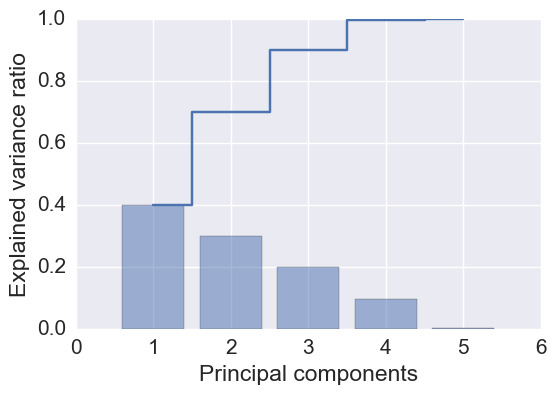

In [636]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(range(1, 6), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 6), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

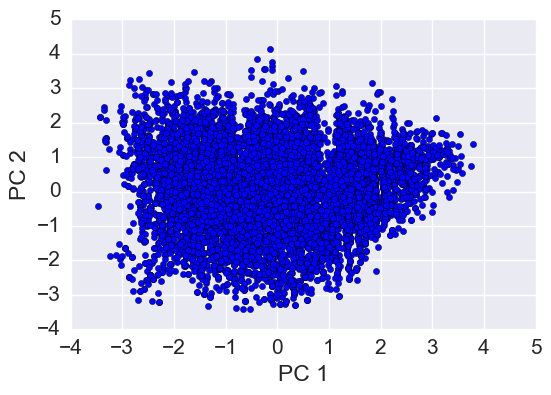

In [637]:
# visualization of two principal components
pca = PCA(n_components=2)
X_train_weather_std_pca2 = pca.fit_transform(X_train_weather_std)

plt.scatter(X_train_weather_std_pca2[:,0], X_train_weather_std_pca2[:,1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

In [638]:
# Applying pca for training a model. We use 2 principal components
pca = PCA(n_components=2)
X_train_weather_pca = pca.fit_transform(X_train_weather_std)
X_test_weather_pca = pca.transform(X_test_weather_std)

In [639]:
X_train_weather_pca.shape, X_train_not_weather.shape

((8708, 2), (8708, 30))

In [599]:
#polynomial features for linear regression
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(2)
X_train_weather_pca_polynomial = pf.fit_transform(X_train_weather_pca )
X_test_weather_pca_polynomial = pf.transform(X_test_weather_pca)

In [600]:
X_test_weather_pca_polynomial.shape, X_train_weather_pca_polynomial.shape

((2178, 6), (8708, 6))

In [640]:
#merging weather data and time data

X_train_preprocessed = np.hstack((X_train_not_weather, X_train_weather_pca))
X_test_preprocessed = np.hstack((X_test_not_weather, X_test_weather_pca))

#X_train_preprocessed = np.hstack((X_train_not_weather, X_train_weather_pca_polynomial))
#X_test_preprocessed = np.hstack((X_test_not_weather, X_test_weather_pca_polynomial))

In [641]:
X_train_preprocessed.shape, X_test_preprocessed.shape, X_preprocessed.shape, y_test.shape, y_merged.shape

((8708, 32), (2178, 32), (10886, 36), (2178,), (10886, 1))

In [642]:
# Everything ready for training a model
X_train = X_train_preprocessed
X_test = X_test_preprocessed

y_test_log = np.log(y_test)

X_preprocessed = np.vstack((X_train_preprocessed, X_test_preprocessed))
y_merged_log = np.vstack((y_train.reshape(len(y_train), 1), y_test_log.reshape(len(y_test), 1)))

X = X_preprocessed
y = y_merged_log.ravel()

# Training a model

## Random Forest Regressor

In [643]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

pipe_rfr = Pipeline([('rfr', RandomForestRegressor())])

param_range_n_estimators = [100, 500, 600, 1000]

param_range_max_depth = [1, 5, 10, 100, None]

param_grid = [{'rfr__n_estimators': param_range_n_estimators, 
               'rfr__max_depth': param_range_max_depth,
               'rfr__criterion': ['mse']}]

gs = GridSearchCV(estimator=pipe_rfr, 
                  param_grid=param_grid, 
                  scoring='neg_mean_squared_error', 
                  cv=10,
                  verbose = 20,
                  n_jobs=-1)

gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    6.1s
[Paralle

-0.228078608732
{'rfr__n_estimators': 1000, 'rfr__criterion': 'mse', 'rfr__max_depth': None}


In [644]:
pd.DataFrame(gs.cv_results_).head(5) 

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_rfr__criterion,param_rfr__max_depth,param_rfr__n_estimators,params,rank_test_score,split0_test_score,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.447994,0.011735,-1.828086,-1.826862,mse,1,100,"{'rfr__n_estimators': 100, 'rfr__criterion': '...",20,-1.745865,...,-1.911476,-1.815707,-1.878369,-1.813032,-1.856287,-1.828174,0.077120,0.003768,0.069137,0.008482
1,3.154190,0.056450,-1.826159,-1.824724,mse,1,500,"{'rfr__n_estimators': 500, 'rfr__criterion': '...",17,-1.743944,...,-1.913050,-1.816730,-1.882866,-1.817394,-1.846846,-1.815222,0.195525,0.011211,0.069782,0.007210
2,3.680690,0.068182,-1.826381,-1.825039,mse,1,600,"{'rfr__n_estimators': 600, 'rfr__criterion': '...",18,-1.748291,...,-1.914848,-1.818483,-1.876427,-1.811136,-1.846166,-1.814577,0.547687,0.012700,0.069015,0.008848
3,6.479031,0.114004,-1.826391,-1.824810,mse,1,1000,"{'rfr__n_estimators': 1000, 'rfr__criterion': ...",19,-1.741650,...,-1.913586,-1.817330,-1.880462,-1.815050,-1.845477,-1.813626,0.302428,0.022661,0.069718,0.007750
4,2.134075,0.013035,-0.822508,-0.811780,mse,5,100,"{'rfr__n_estimators': 100, 'rfr__criterion': '...",13,-0.885218,...,-0.869341,-0.812206,-0.766562,-0.800428,-0.855567,-0.812801,0.165499,0.002414,0.053206,0.007485


In [645]:
best_rfr = gs.best_estimator_

In [646]:
best_rfr.fit(X_train, y_train)

Pipeline(steps=[('rfr', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False))])

## Linear Regression

In [531]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [544]:
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor()

ransac.fit(X_train, y_train)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        loss='absolute_loss', max_trials=100, min_samples=None,
        random_state=None, residual_metric=None, residual_threshold=None,
        stop_n_inliers=inf, stop_probability=0.99, stop_score=inf)

In [548]:
from sklearn.linear_model import Ridge

lr = Ridge()

lr.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [571]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

lr = Pipeline([('lr', Ridge())])

param_range_alpha = [0.02, 0.05, 0.1, 0.2, 0.5]


param_grid = [{'lr__alpha': param_range_alpha}]

gs = GridSearchCV(estimator=lr, 
                  param_grid=param_grid, 
                  scoring='neg_mean_squared_error', 
                  cv=10,
                  verbose = 20,
                  n_jobs=-1)

gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.0s
[Paralle

-0.453470687206
{'lr__alpha': 0.2}


[Parallel(n_jobs=-1)]: Done  44 out of  50 | elapsed:    2.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:    2.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.3s finished


In [572]:
best_lr = gs.best_estimator_

In [573]:
best_lr.fit(X_train, y_train)

Pipeline(steps=[('lr', Ridge(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

# Evaluation

## Linear Regression

In [574]:
y_train_pred = np.exp(best_lr.predict(X_train))
y_test_pred = np.exp(best_lr.predict(X_test))

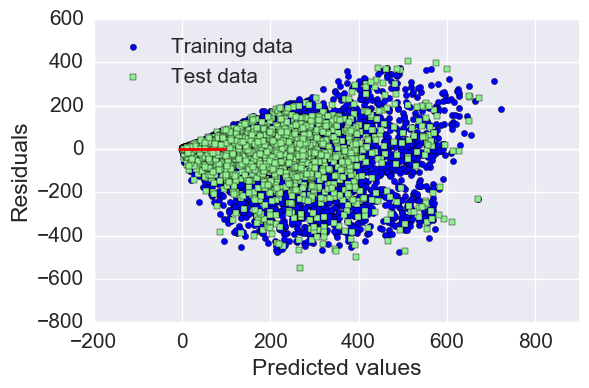

In [575]:
plt.scatter(y_train_pred,  y_train_pred - np.exp(y_train), c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test, c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=100, lw=2, color='red')
plt.xlim([-200, 900])
plt.tight_layout()

plt.show()

In [576]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(np.exp(y_train), y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(np.exp(y_train), y_train_pred),
        r2_score(y_test, y_test_pred)))
print('rmsle train: %.3f, test: %.3f' % (
        rmsle(np.exp(y_train), y_train_pred),
        rmsle(y_test, y_test_pred)))

MSE train: 11590.856, test: 12396.921
R^2 train: 0.646, test: 0.627
rmsle train: 0.634, test: 0.627


In [157]:
import math

# vectorized error calc
def rmsle(y, y0):
    assert len(y) == len(y0)
    return np.sqrt(np.mean(np.power(np.log1p(y)-np.log1p(y0), 2)))

1. why negative values?

## Random Forest Regressor

In [647]:
y_train_pred = np.exp(best_rfr.predict(X_train))
y_test_pred = np.exp(best_rfr.predict(X_test))

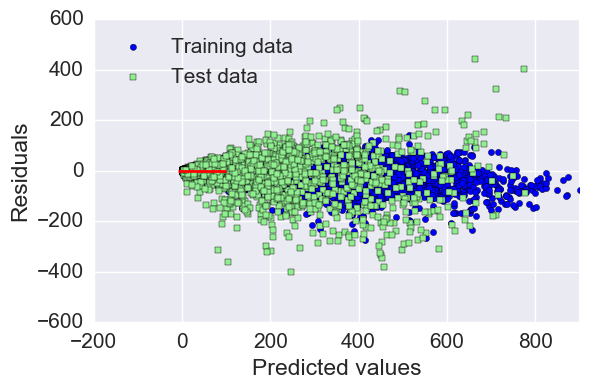

In [648]:
plt.scatter(y_train_pred,  y_train_pred - np.exp(y_train), c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test, c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=100, lw=2, color='red')
plt.xlim([-200, 900])
plt.tight_layout()

plt.show()

In [649]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(np.exp(y_train), y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(np.exp(y_train), y_train_pred),
        r2_score(y_test, y_test_pred)))
print('rmsle train: %.3f, test: %.3f' % (
        rmsle(np.exp(y_train), y_train_pred),
        rmsle(y_test, y_test_pred)))

MSE train: 1052.396, test: 6280.241
R^2 train: 0.968, test: 0.814
rmsle train: 0.165, test: 0.444


1. badly overfitting

# Preparing solution for Kaggle

In [650]:
sample_submission = pd.read_csv('sampleSubmission.csv')
sample_submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [651]:
df_test =  pd.read_csv('test.csv')
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [652]:
# retraining the chosen model on the whole dataset
best_rfr.fit(X, y)

Pipeline(steps=[('rfr', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False))])

## Preprocessing Kaggle test data

In [653]:
# extracting 'hour'
time_column = pd.DatetimeIndex(df_test['datetime'])
hour = time_column.hour
df_test['hour'] = hour

In [654]:
# to numpy array
X_2 = df_test[['season', 'hour', 'workingday', 'holiday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed']].values

In [655]:
# One hot encoding
X_2 = ohe.transform(X_2).toarray()

In [656]:
#dividing into weather data: 'weather', 'temp', 'atemp', 'humidity', 'windspeed' 
#and non-weather data 'season', 'hour', 'workingday', 'holiday'

X_2_not_weather, X_2_weather = X_2[:, :-5], X_2[:, -5:]

In [657]:
#standarizing 'weather', 'temp', 'atemp', 'humidity', 'windspeed'

X_2_weather_std = sc.transform(X_2_weather)

In [658]:
# Applying PCA

X_2_weather_pca = pca.transform(X_2_weather_std)

In [659]:
#adding polynomial features

#X_2_weather_pca_polynomial = pf.transform(X_2_weather_pca)

In [660]:
#merging weather data and time data

#X_2_preprocessed = np.hstack((X_2_not_weather, X_2_weather_pca_polynomial))
X_2_preprocessed = np.hstack((X_2_not_weather, X_2_weather_pca))

X_2_preprocessed.shape

(6493, 32)

In [661]:
#Everything is ready for predicting

X_2 = X_2_preprocessed

In [662]:
# Predicting

y_2 = best_rfr.predict(X_2)

In [663]:
# y was log-transformed

y_2 = np.exp(y_2)

In [664]:
# Saving to predicted values to data frame
dt_2 = df_test['datetime'].values

df_result = pd.DataFrame(np.hstack((dt_2.reshape((len(dt_2),1)), y_2.reshape((len(y_2),1)))), columns = ['datetime', 'count'])

In [665]:
df_result.head(10)

,datetime,count
0,2011-01-20 00:00:00,12.4767
1,2011-01-20 01:00:00,2.40545
2,2011-01-20 02:00:00,1.66723
3,2011-01-20 03:00:00,3.67597
4,2011-01-20 04:00:00,2.12667
5,2011-01-20 05:00:00,9.07815
6,2011-01-20 06:00:00,43.6102
7,2011-01-20 07:00:00,148.721
8,2011-01-20 08:00:00,297.333
9,2011-01-20 09:00:00,184.717


In [666]:
# Saving to predicted values to csv

df_result.to_csv(path_or_buf = 'result.csv', index = False)